In [41]:
%run library_simulator.py

Customer (Normal) served at 3.13 minutes
Customer (Normal) left at 20.05 minutes after waiting too long
Customer (Normal) left at 22.15 minutes after waiting too long
Customer (Slow) served at 30.43 minutes
Customer (Fast) served at 32.96 minutes
Customer (Normal) served at 33.35 minutes
Customer (Normal) served at 45.33 minutes
Customer (Fast) served at 51.08 minutes
Customer (Fast) served at 62.36 minutes
Customer (Normal) served at 64.91 minutes
Customer (Fast) served at 66.13 minutes
Customer (Slow) served at 78.02 minutes
Customer (Fast) served at 81.43 minutes
Customer (Normal) served at 96.74 minutes
Customer (Normal) served at 104.94 minutes
Customer (Fast) served at 108.01 minutes
Customer (Fast) served at 109.25 minutes
Customer (Normal) served at 109.68 minutes
Customer (Normal) left at 132.29 minutes after waiting too long
Customer (Normal) left at 146.45 minutes after waiting too long
Customer (Fast) left at 153.06 minutes after waiting too long
Customer (Slow) left at 157

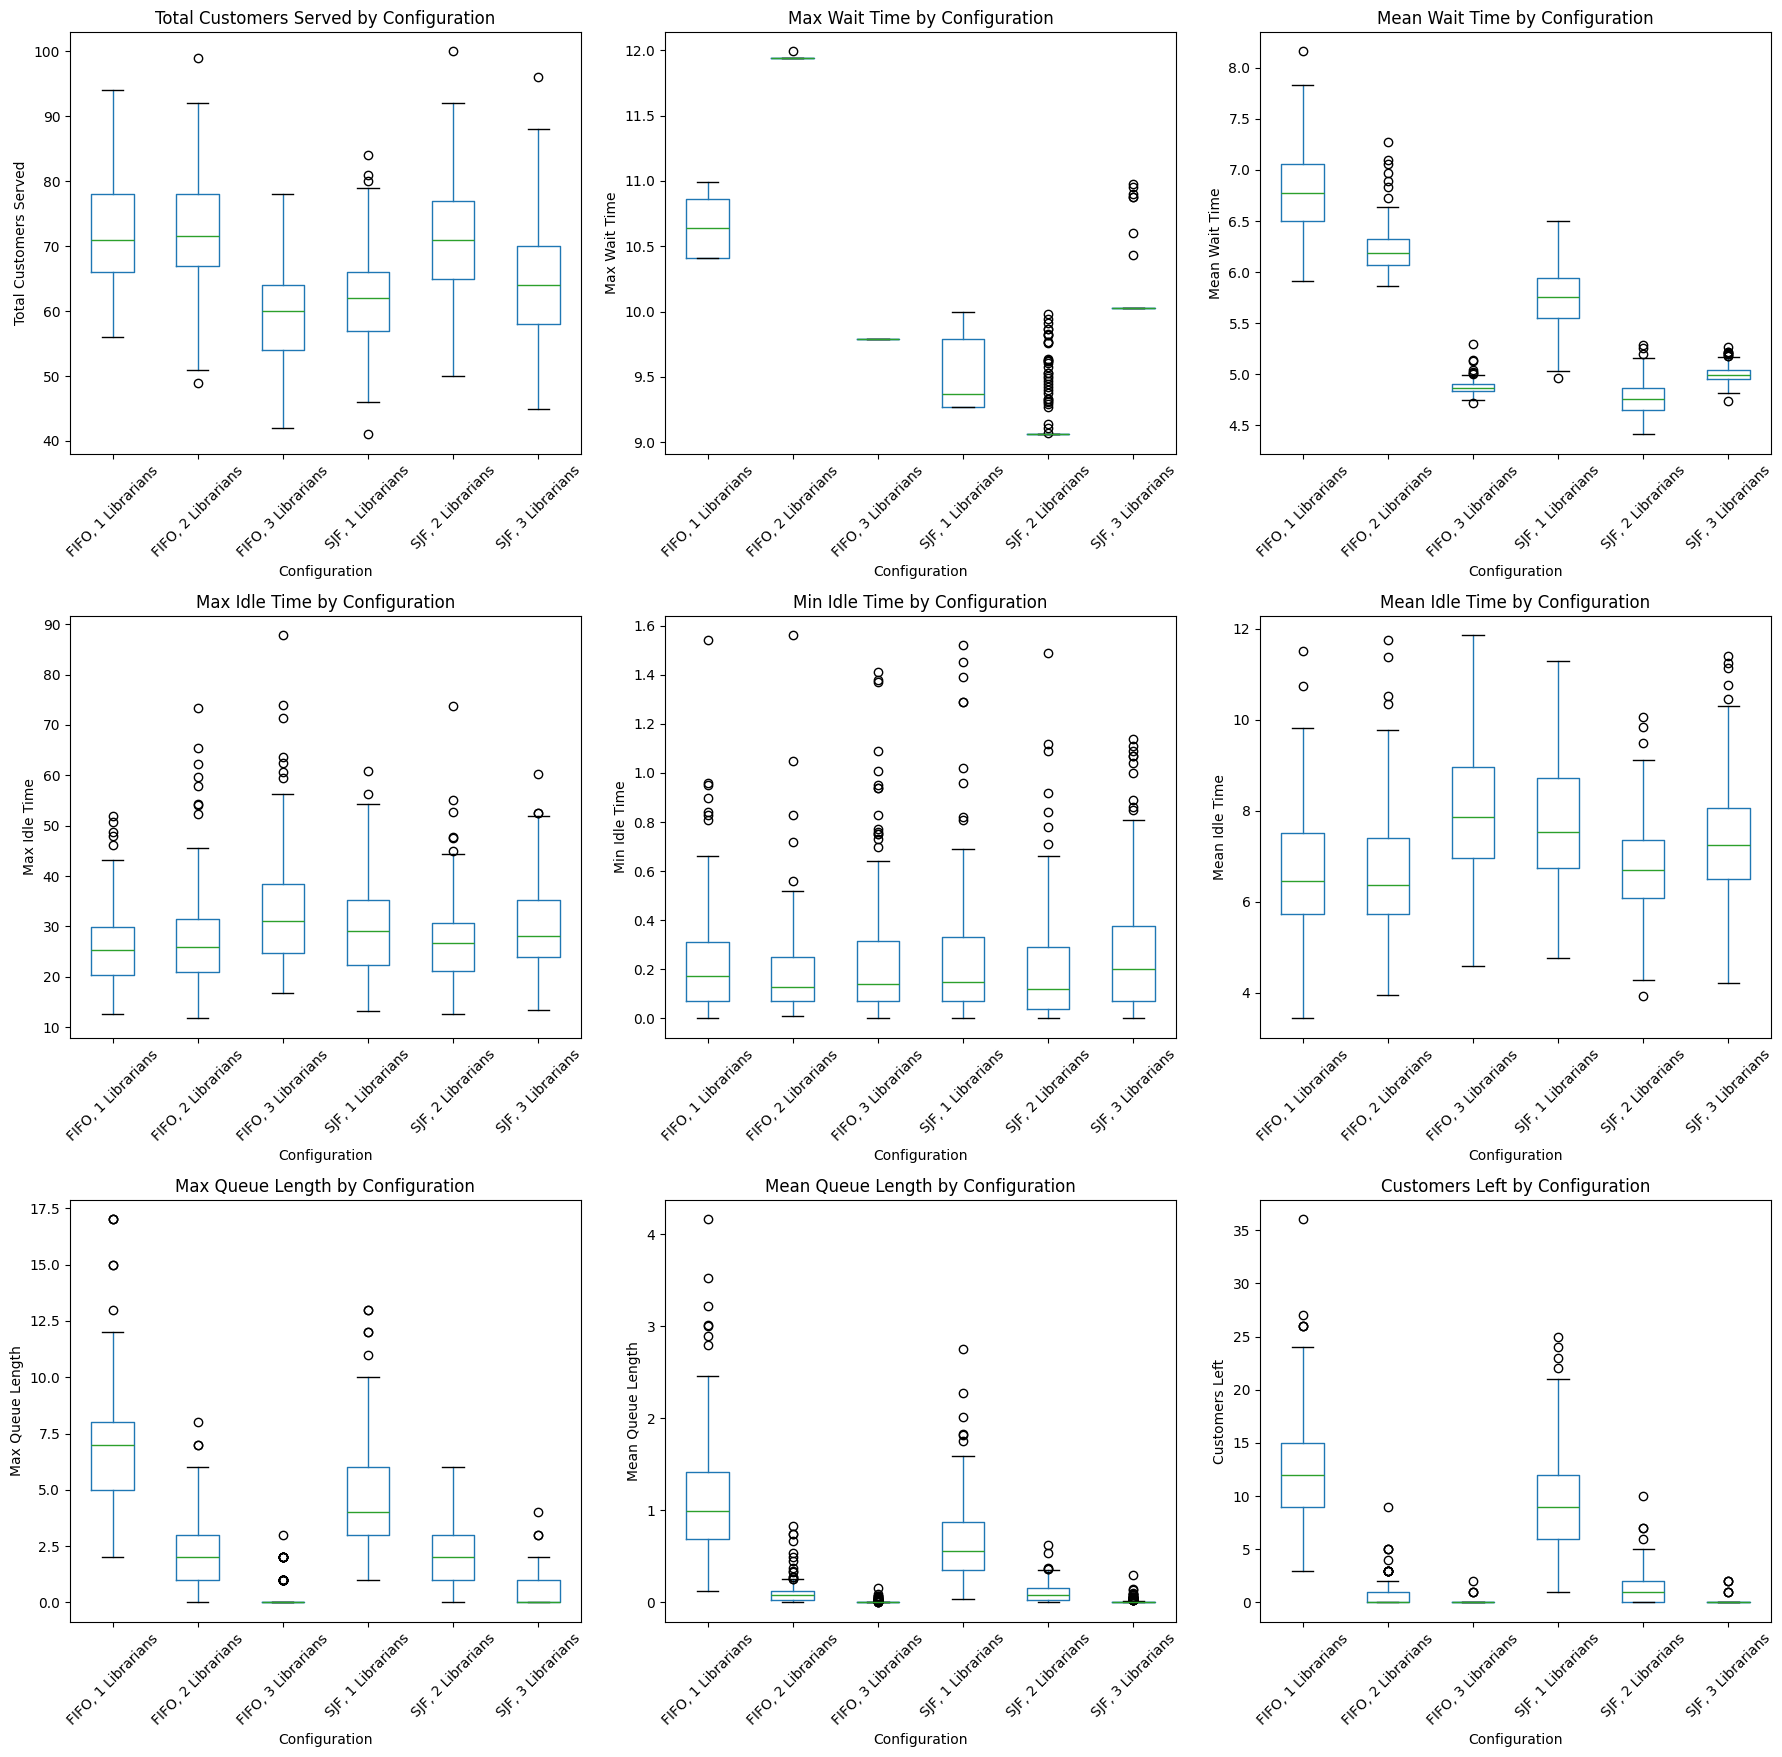

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
data = pd.read_csv('all_simulations_statistics.csv')

# Convertir la columna 'Policy' a cadena para facilitar el manejo
data['Policy'] = data['Policy'].astype(str)

# Crear una columna para representar las configuraciones
data['Configuration'] = data['Policy'] + ', ' + data['Num Librarians'].astype(str) + ' Librarians'

# Lista de las columnas de interés
columns_of_interest = [
    'Total Customers Served', 'Max Wait Time', 'Mean Wait Time', 'Max Idle Time', 
    'Min Idle Time', 'Mean Idle Time', 'Max Queue Length', 'Mean Queue Length', 'Customers Left'
]

# Configurar el grid de gráficos
num_columns = 3
num_rows = (len(columns_of_interest) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 18))
axes = axes.flatten()

# Crear boxplots para cada columna de interés
for i, column in enumerate(columns_of_interest):
    # Crear el boxplot
    data.boxplot(column=column, by='Configuration', ax=axes[i], grid=False)
    axes[i].set_title(f'{column} by Configuration')
    axes[i].set_xlabel('Configuration')
    axes[i].set_ylabel(column)
    axes[i].tick_params(axis='x', rotation=45)

# Ajustar diseño para evitar superposición de gráficos
plt.tight_layout()
plt.suptitle('')  # Eliminar el título superfluo generado por pandas
plt.show()
